# SQUAD RAPIDMINER
Ruben Tenreiro <br>
Marco Hernani<br>
Francisco Ávila<br>

# Introduction

Prediction of a person's salary based on their characteristics.
The objective of the problem is to predict if a person has a salary of more than 50 thousand
dollars per year or not, based on their characteristics.
We will make use of the Adult dataset. This dataset comes from  <a href="https://archive.ics.uci.edu/ml/datasets/Census+Income" > California Irvine path university </a>

# Open file and import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix, classification_report #
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, auc
from ydata_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_confusion_matrix

from sklearn import tree



In [2]:
columnas = ["age", "work_class", "fnlwgt", "education", "education_num",
            "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
            "hours_per_week", "native_country", "target"]

In [3]:
df = pd.read_csv("Data/adult.data", header = None, names = columnas)
df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Checking whether the information in "education" and "education num" is redundant

In [7]:
for i in df.columns:
    
    print(df[i].unique(), "\n", sep = "")

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

[ 77516  83311 215646 ...  34066  84661 257302]

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces

# EDA

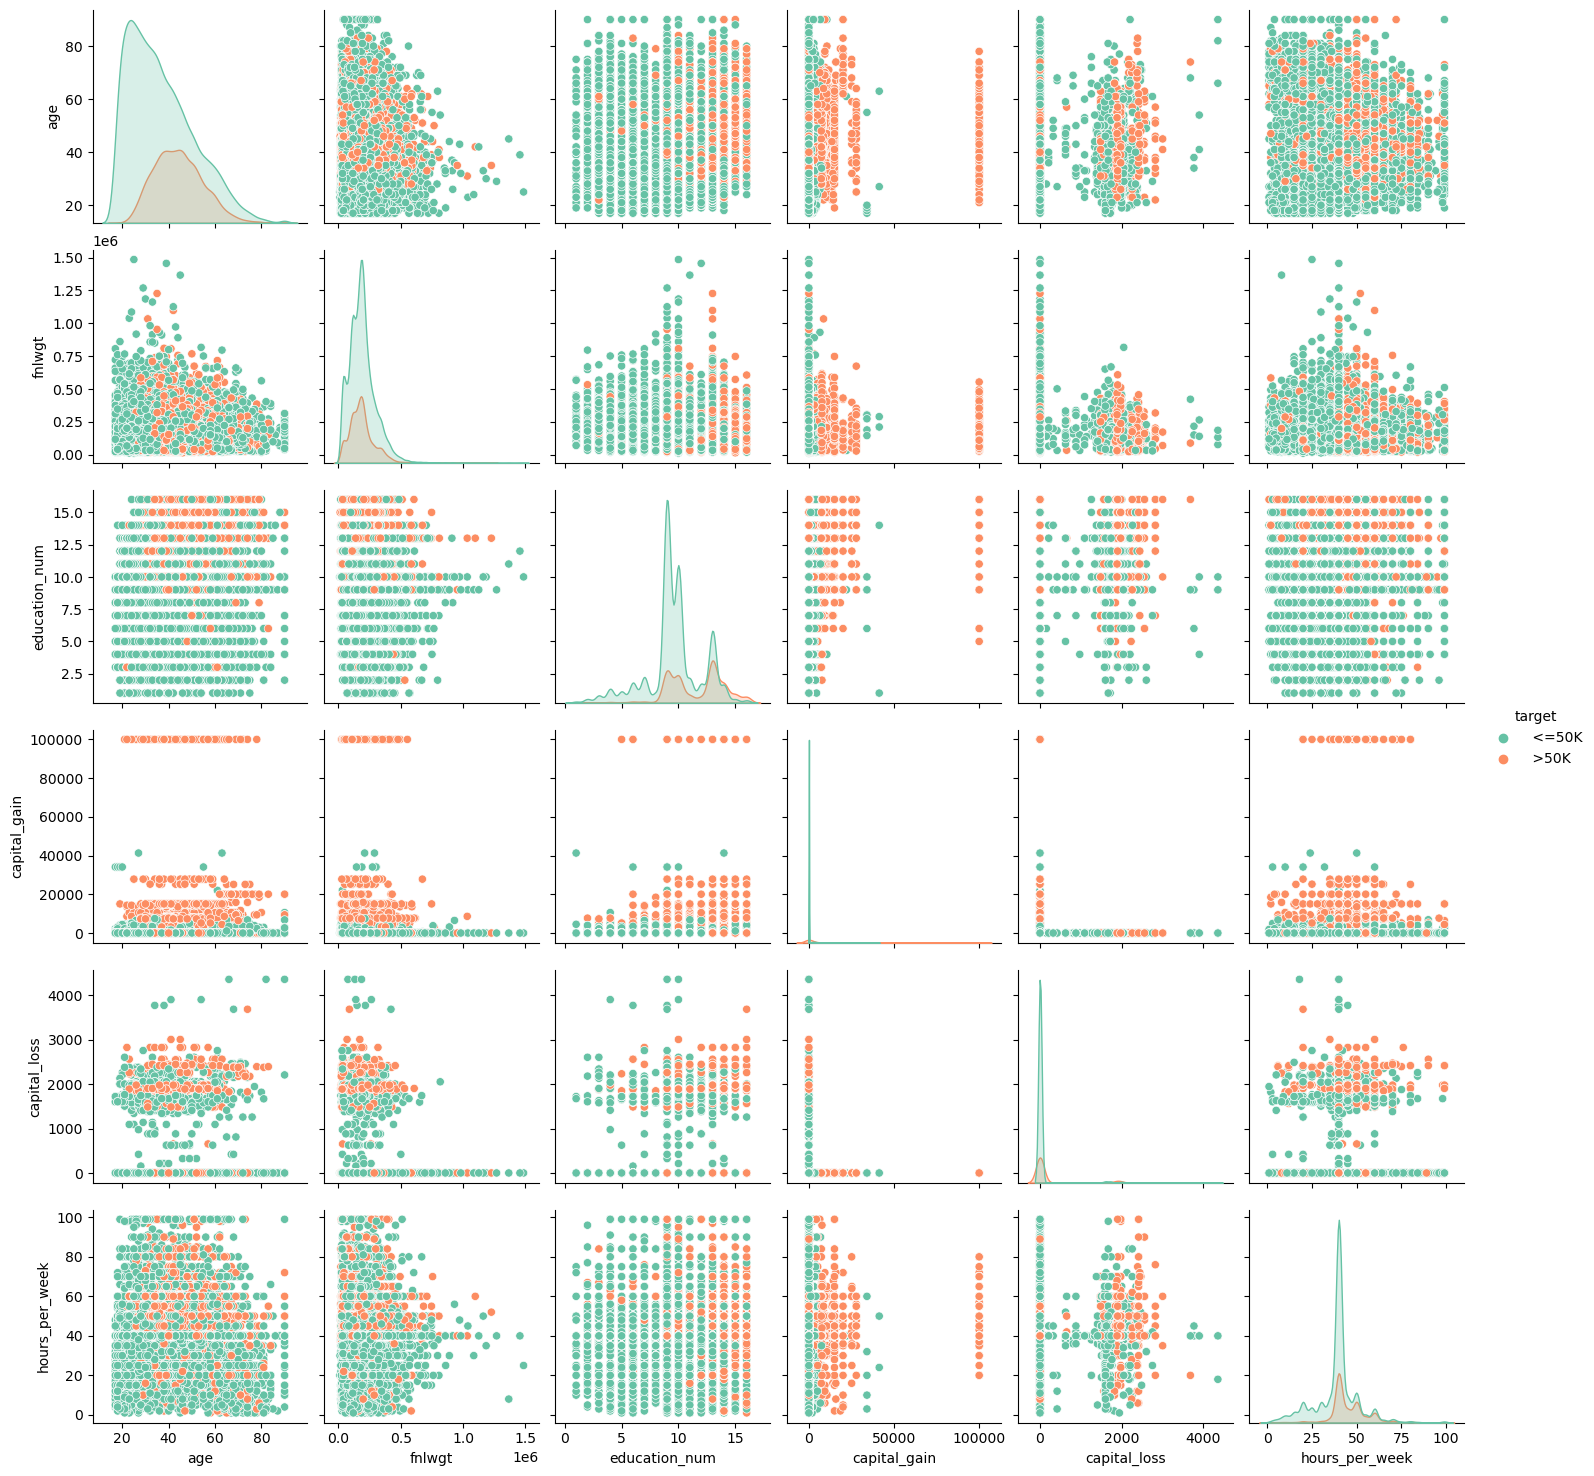

In [8]:
sns.pairplot(data=df, hue = "target", palette="Set2")
plt.show()

Checking whether the information in "education" and "education num" is redundant

In [9]:
len(df["education"].unique()) == len(df["education_num"].unique())

True

## Drop columns

We're removing the columns `capital_gain` and `capital_loss` because they have a large number of 0s. In machine learning is a common practice because these columns, also known as "sparse" features, do not contribute much to the learning process and can potentially negatively impact the performance of the machine learning model. <br> `Education_num` is dropped because is redundant information. <br>And `fnlwgt` is eliminated because it represent how many times a row is repetead

In [10]:
df_semiclean = df.drop(labels = ["capital_gain", "capital_loss", "education_num", "fnlwgt"], axis = 1)
print(df_semiclean.shape)
df_semiclean.head(4)

(32561, 11)


,age,work_class,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K


## Drop missing values

In [11]:
objetos = [k for k, v in df_semiclean.dtypes.items() if v == "object"]

for i in objetos:

    df_semiclean.drop(df_semiclean[df_semiclean[i] == ' ?'].index, inplace = True)
    
df_semiclean.shape

(30162, 11)

## Plotting and casting columns

In [12]:
def plot_me(df_semiclean):
    aux_df = df_semiclean.copy()
    for col in aux_df:
        if col == 'target':
            pass
        elif aux_df[col].dtypes == 'object' or aux_df[col].dtypes == 'category' :

            aux_df[col] = aux_df[col].astype("category")

            x = aux_df[col].value_counts().index
            y1 = aux_df[df["target"] == " >50K"][col].value_counts().values
            y2 = aux_df[df["target"] == " <=50K"][col].value_counts().values

            plt.bar(x, y1, color='r')
            plt.bar(x, y2, bottom = y1, color='b')

            plt.xticks(rotation=90)
            plt.suptitle(col) 
            plt.show()
        else:
            sns.histplot(aux_df[col])
            plt.suptitle(col)
            plt.show()

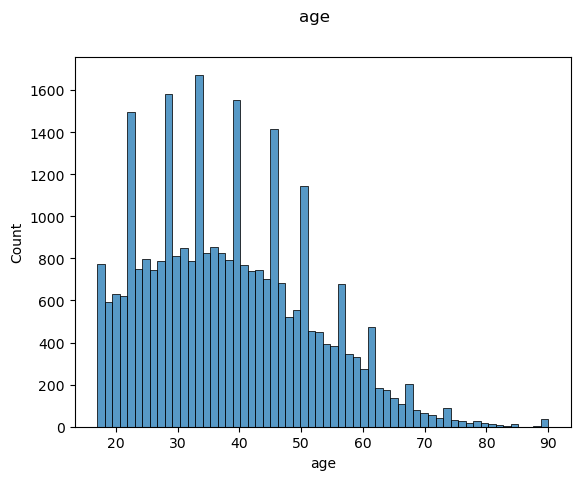

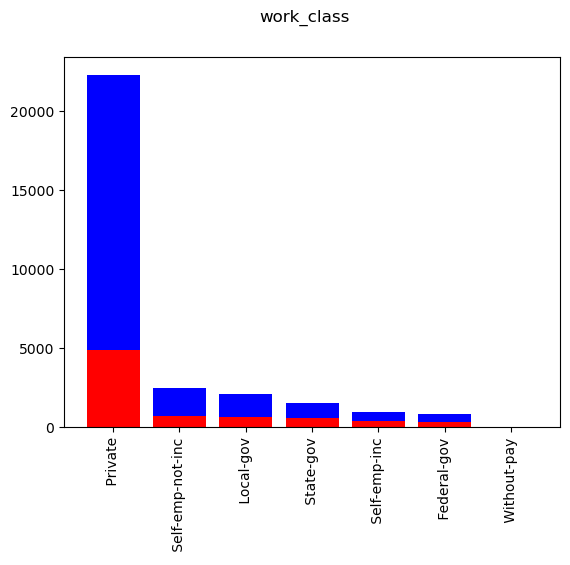

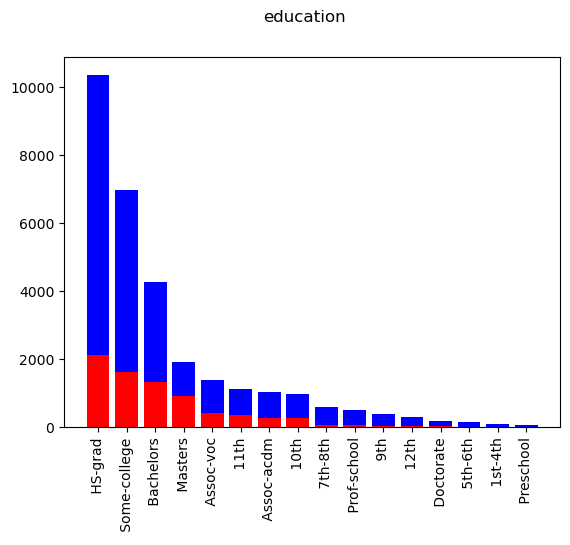

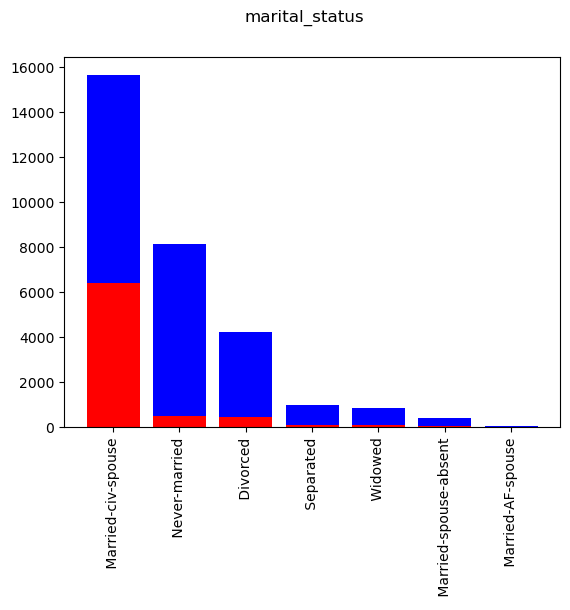

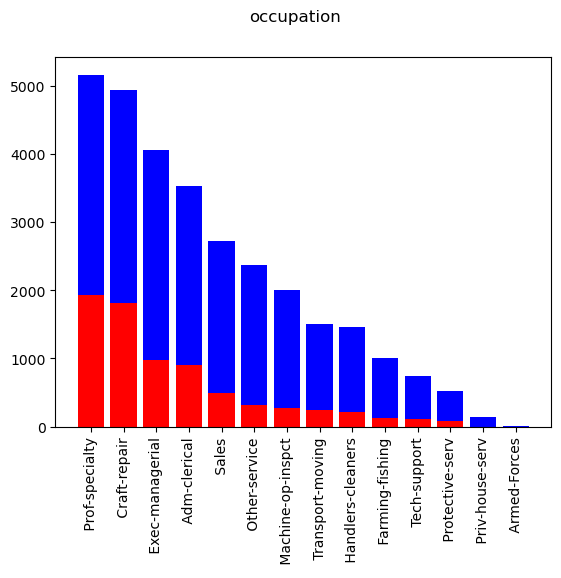

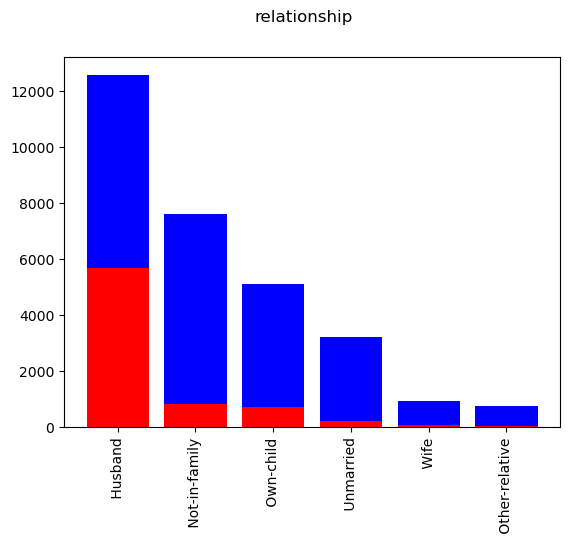

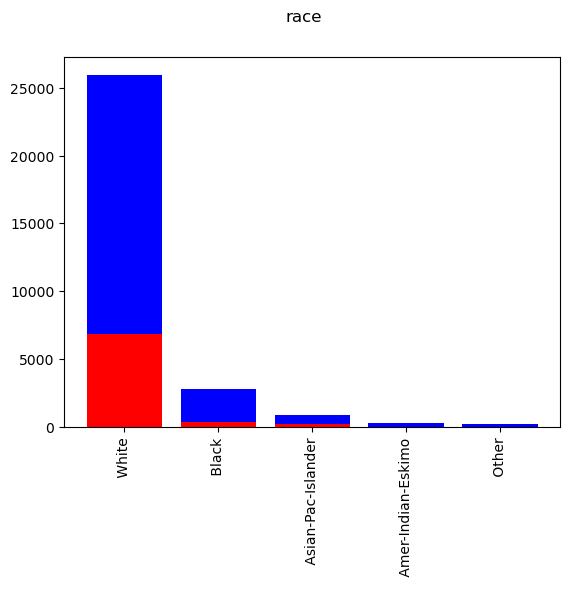

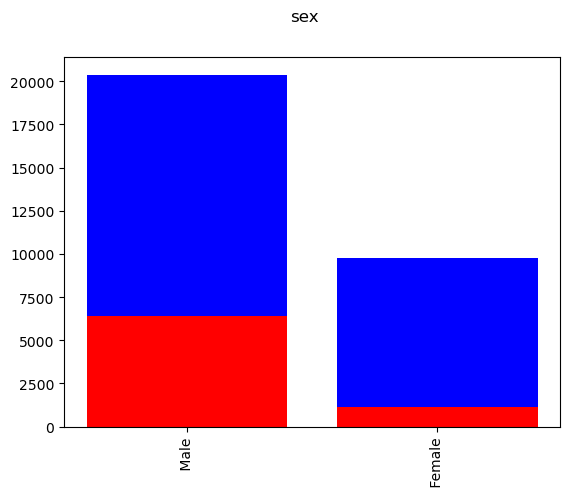

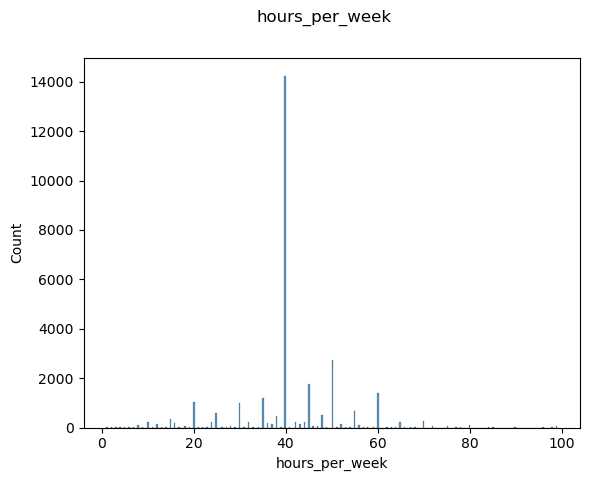

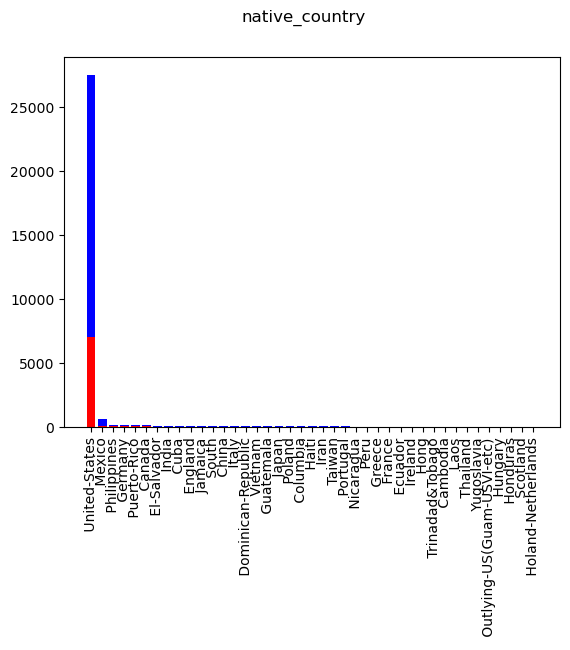

In [13]:
plot_me(df_semiclean)

In [14]:
df_semiclean["target"] = df_semiclean.target.astype("category")
df_semiclean.dtypes

age                  int64
work_class          object
education           object
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
hours_per_week       int64
native_country      object
target            category
dtype: object

In [15]:
df_semiclean["hours_per_week"].describe()

count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

## Transforming hours per week

We group hours per week in 4 levels:<br>
>0. 1-20h<br>
>1. 21-40h<br>
>2. 41-60h<br>
>3. +60h

In [16]:
def cast_hpw(n):
    """Changes a number of hours per week to a value
    n: number of hours per week
    returns: 0, 1, 2, 3"""
    if n <= 20:
        return 0 
    elif n <= 40:
        return 1
    elif n <=60:
        return 2
    else:
        return 3
        

In [17]:
df_semiclean["hours_per_week"]= df_semiclean["hours_per_week"].apply(cast_hpw)

In [18]:
df_semiclean["hours_per_week"].value_counts()

1    18577
2     8145
0     2388
3     1052
Name: hours_per_week, dtype: int64

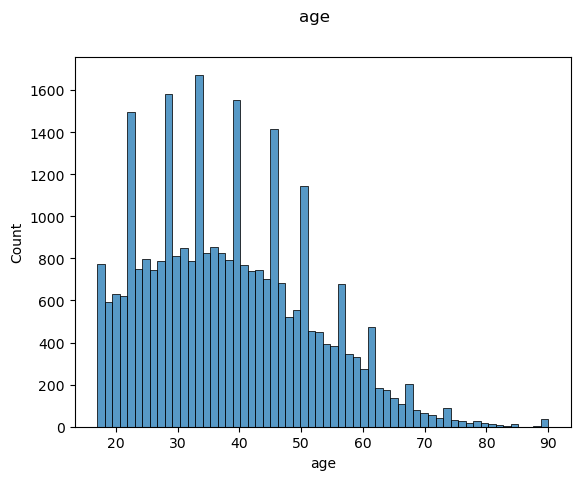

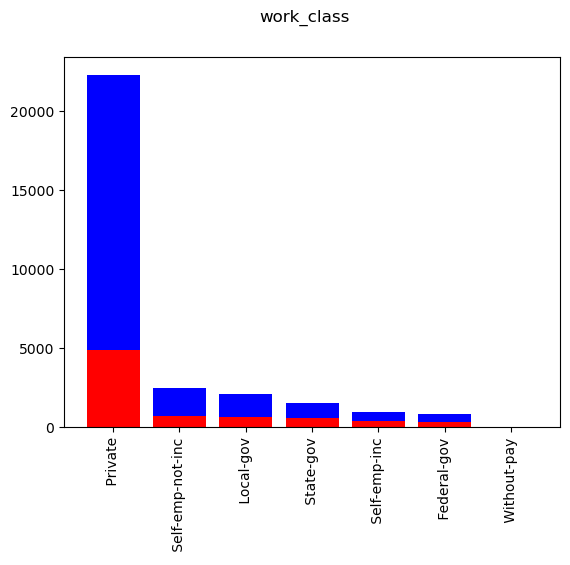

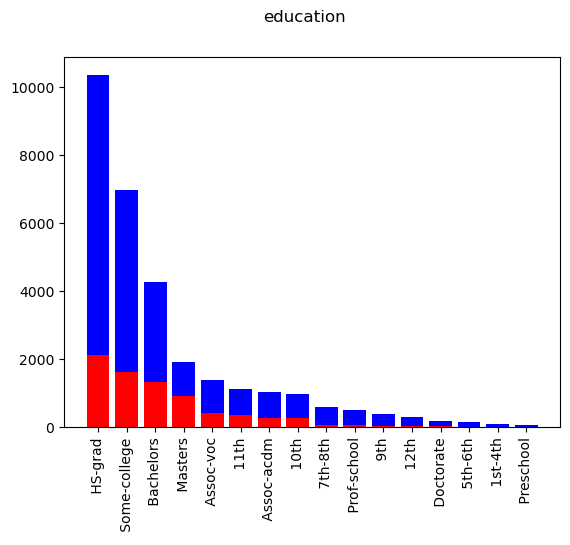

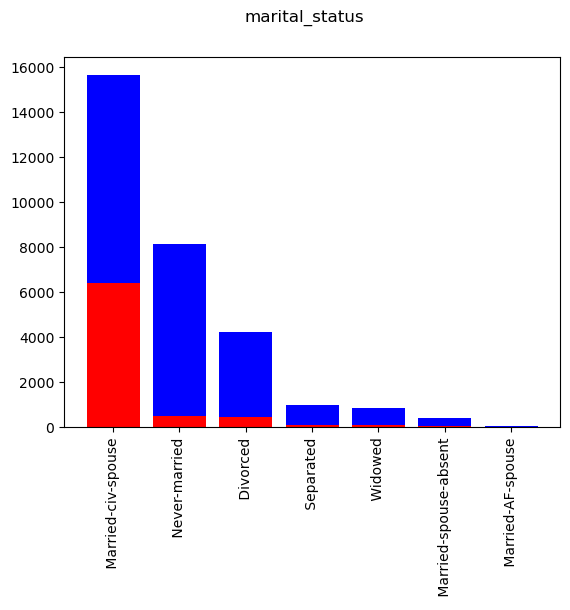

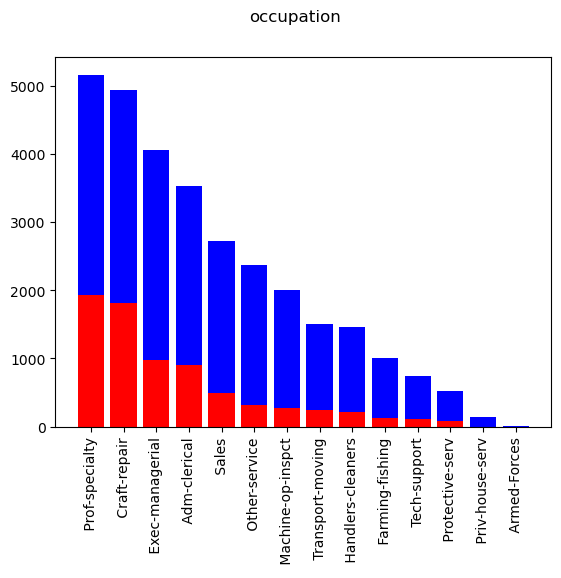

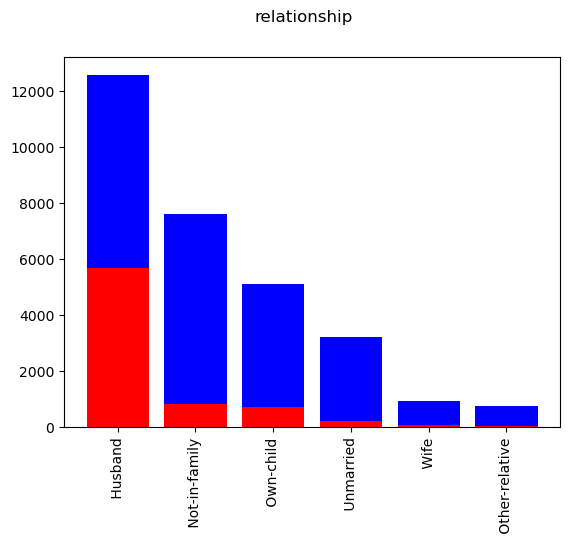

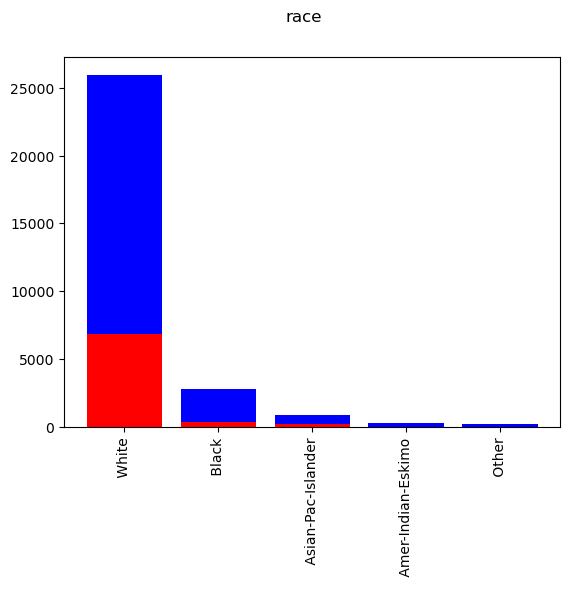

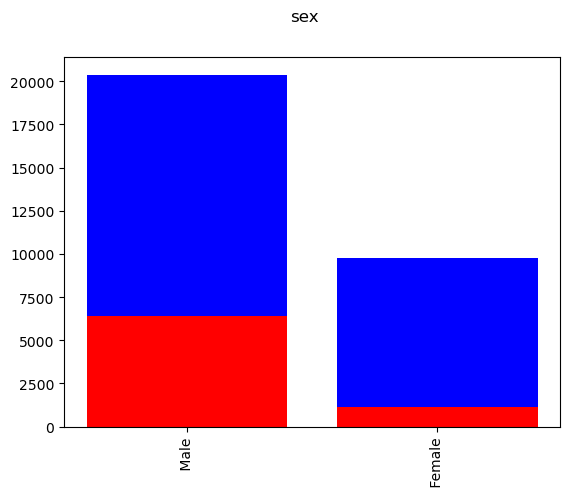

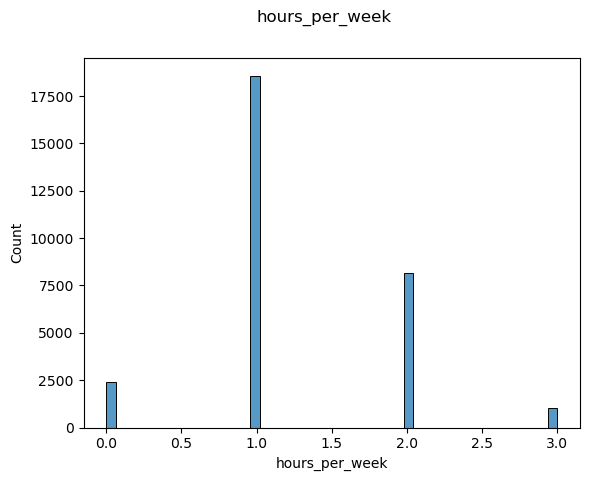

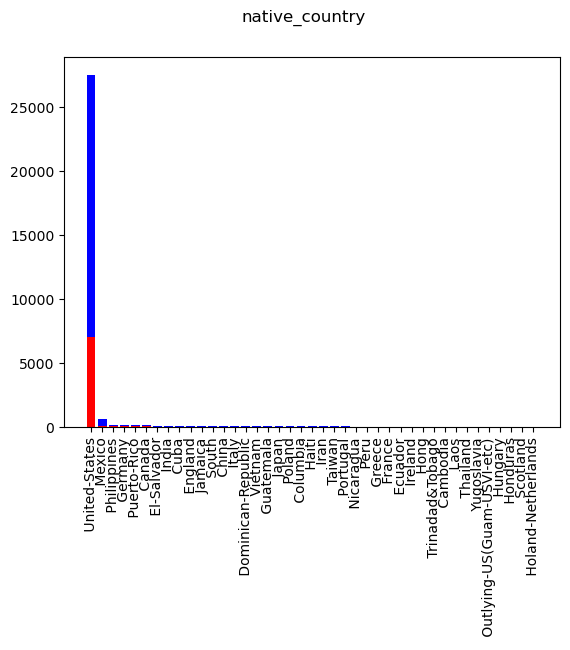

In [19]:
plot_me(df_semiclean)

## Cleaning gaps 

In [20]:
categorias = [k for k, v in df_semiclean.dtypes.items() if v == "object"]

In [21]:
for i in categorias:
    print(list(df_semiclean[i].unique()), "\n", sep = "")

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']

[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']

[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' Craft-repair', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']

[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']

[' Male', ' Female']

[' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico', ' Puerto-Rico', ' Honduras', ' England', ' Can

In [22]:
for i in categorias:
    df_semiclean[i] = df_semiclean[i].apply(lambda x: x.lstrip(" "))

In [23]:
for i in categorias:
    print(set(df_semiclean[i]), "\n", sep = "")

{'Self-emp-not-inc', 'Without-pay', 'Federal-gov', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Private'}

{'Masters', 'Assoc-voc', 'Assoc-acdm', 'Doctorate', '5th-6th', '12th', 'HS-grad', 'Some-college', '10th', 'Preschool', 'Prof-school', '1st-4th', 'Bachelors', '9th', '11th', '7th-8th'}

{'Married-spouse-absent', 'Separated', 'Widowed', 'Divorced', 'Never-married', 'Married-AF-spouse', 'Married-civ-spouse'}

{'Other-service', 'Exec-managerial', 'Sales', 'Transport-moving', 'Handlers-cleaners', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Farming-fishing', 'Prof-specialty', 'Machine-op-inspct', 'Protective-serv'}

{'Husband', 'Wife', 'Own-child', 'Not-in-family', 'Other-relative', 'Unmarried'}

{'Black', 'Amer-Indian-Eskimo', 'Other', 'White', 'Asian-Pac-Islander'}

{'Female', 'Male'}

{'Jamaica', 'England', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands', 'Vietnam', 'Ecuador', 'Trinadad&Tobago', 'Ireland', 'Nicaragua', 'Germany'

## Transforming target variable to categorical

In [24]:
df_semiclean["target"] = df_semiclean.target.cat.codes
df_semiclean.rename(columns = {"target" : ">50K"}, inplace = True)
df_semiclean

,age,work_class,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,>50K
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,1,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,1,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,1,United-States,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1,United-States,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,1,United-States,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,United-States,0


## Grouping categorical variables

We're going to group some categories to reduce dimensionality of the final dataset and to address class imbalance as well as to improve generalization capabalities.

In [25]:
df_semiclean["work_class"]= df_semiclean["work_class"].apply(lambda x:1 if x == "Private" else 0)
df_semiclean["race"]= df_semiclean["race"].apply(lambda x:1 if x == "White" else 0)
df_semiclean["native_country"]= df_semiclean["native_country"].apply(lambda x:1 if x == "United-States" else 0)
df_semiclean.sex= df_semiclean.sex.astype("category").cat.codes

In [26]:
df_semiclean.dtypes

age                int64
work_class         int64
education         object
marital_status    object
occupation        object
relationship      object
race               int64
sex                 int8
hours_per_week     int64
native_country     int64
>50K                int8
dtype: object

## OneHotEnconding the other categories


In [27]:
jj = OneHotEncoder(drop= 'first')

In [28]:
encoded_df = pd.DataFrame(jj.fit_transform(df_semiclean[['education', 'marital_status', 'occupation', 'relationship']]).toarray())

In [29]:
encoded_df.columns = jj.get_feature_names()

In [30]:
encoded_df

,x0_11th,x0_12th,x0_1st-4th,x0_5th-6th,x0_7th-8th,x0_9th,x0_Assoc-acdm,x0_Assoc-voc,x0_Bachelors,x0_Doctorate,...,x2_Prof-specialty,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Not-in-family,x3_Other-relative,x3_Own-child,x3_Unmarried,x3_Wife
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df_semiclean.drop(['education', 'marital_status', 'occupation', 'relationship'], axis= 1, inplace=True)

In [32]:
df_semiclean = df_semiclean.reset_index(drop=True)

In [33]:
df_final= pd.concat([df_semiclean, encoded_df], axis= 1)
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
work_class,30162.0,0.738877,0.439254,0.0,0.0,1.0,1.0,1.0
race,30162.0,0.859790,0.347210,0.0,1.0,1.0,1.0,1.0
sex,30162.0,0.675685,0.468126,0.0,0.0,1.0,1.0,1.0
hours_per_week,30162.0,1.260626,0.648703,0.0,1.0,1.0,2.0,3.0
native_country,30162.0,0.911876,0.283480,0.0,1.0,1.0,1.0,1.0
>50K,30162.0,0.248922,0.432396,0.0,0.0,0.0,0.0,1.0
x0_11th,30162.0,0.034746,0.183138,0.0,0.0,0.0,0.0,1.0
x0_12th,30162.0,0.012499,0.111101,0.0,0.0,0.0,0.0,1.0
x0_1st-4th,30162.0,0.005006,0.070579,0.0,0.0,0.0,0.0,1.0


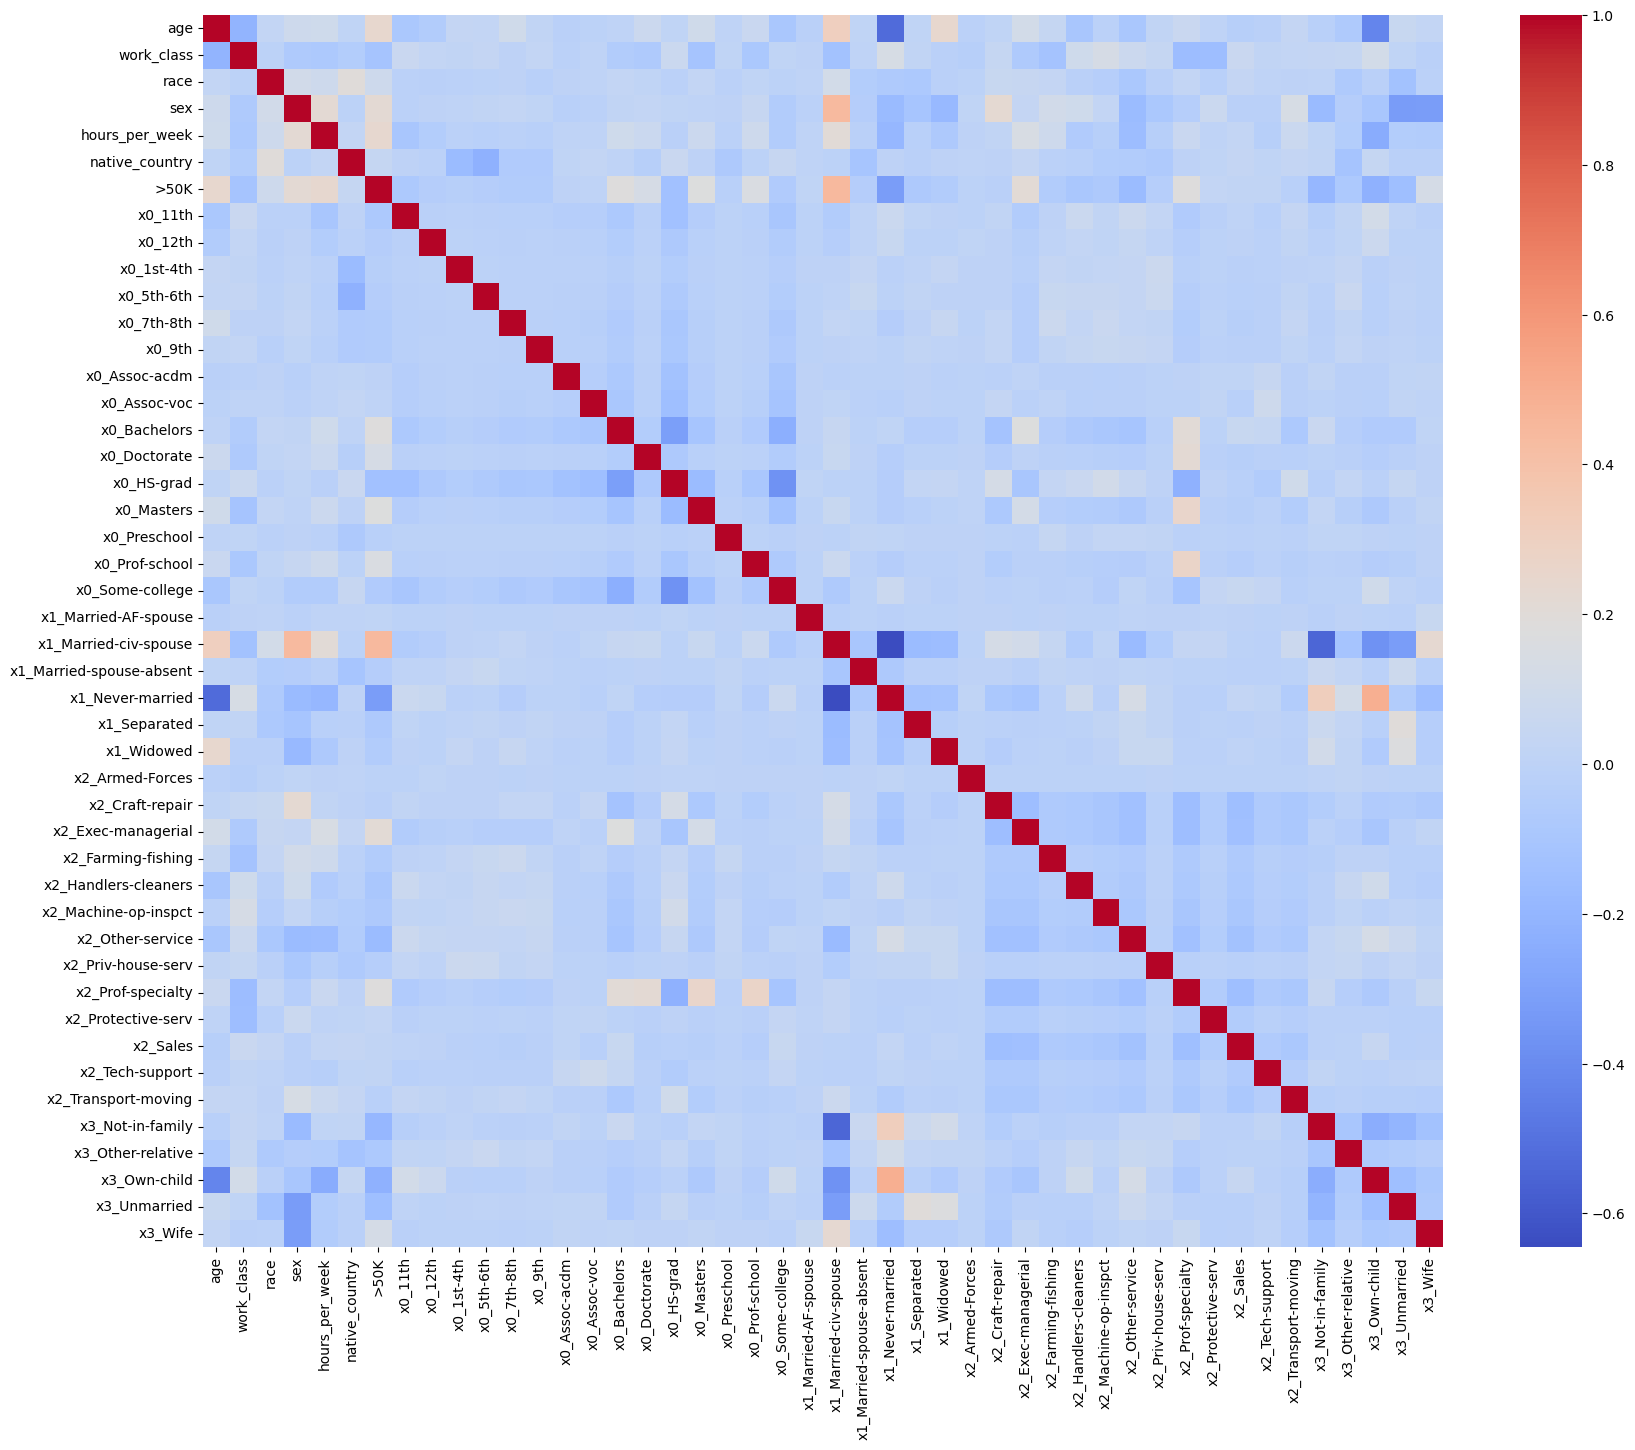

In [34]:
fig, ax = plt.subplots(figsize=(20, 16))

# Generamos el mapa de calor
sns.heatmap(df_final.corr(), cmap='coolwarm', ax=ax)

# Mostramos el mapa de calor
plt.show()

# Preprocessing 

## Split the data in train and test

In [35]:
y= df_final['>50K']
X= df_final.drop('>50K', axis= 1)
X_train_sn,  X_test_sn, y_train_sn, y_test_sn = train_test_split(X, y, train_size=0.8, random_state=1729)

## Standardization 

Normality check (Shapiro-Wilk)

In [36]:
for col_name in df_final:
    
    stat, p = stats.shapiro(df_final[col_name])

    print('Estadístico = %.3f, p = %.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f"{col_name} sigue distribución normal")

Estadístico = 0.970, p = 0.000
Estadístico = 0.547, p = 0.000
Estadístico = 0.411, p = 0.000
Estadístico = 0.590, p = 0.000
Estadístico = 0.785, p = 0.000
Estadístico = 0.318, p = 0.000
Estadístico = 0.538, p = 0.000
Estadístico = 0.176, p = 0.000
Estadístico = 0.085, p = 0.000
Estadístico = 0.042, p = 0.000
Estadístico = 0.069, p = 0.000
Estadístico = 0.113, p = 0.000
Estadístico = 0.097, p = 0.000
Estadístico = 0.171, p = 0.000
Estadístico = 0.204, p = 0.000
Estadístico = 0.450, p = 0.000
Estadístico = 0.084, p = 0.000
Estadístico = 0.591, p = 0.000
Estadístico = 0.235, p = 0.000
Estadístico = 0.016, p = 0.000
Estadístico = 0.111, p = 0.000
Estadístico = 0.512, p = 0.000
Estadístico = 0.008, p = 0.000
Estadístico = 0.635, p = 0.000
Estadístico = 0.084, p = 0.000
Estadístico = 0.589, p = 0.000
Estadístico = 0.163, p = 0.000
Estadístico = 0.149, p = 0.000
Estadístico = 0.004, p = 0.000
Estadístico = 0.401, p = 0.000
Estadístico = 0.399, p = 0.000
Estadístico = 0.169, p = 0.000
Estadíst

## Standardized dataset - StandardScaler()

In [37]:
X_std = df_final.drop(">50K", axis = 1)
y_std = df_final[">50K"]

In [38]:
y_std

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: >50K, Length: 30162, dtype: int8

In [39]:
columns_name = ["age", "hours_per_week"]

In [40]:
X_train_std,  X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, train_size=0.8, random_state=1729)

scaler = preprocessing.StandardScaler().fit(X_train_std[columns_name])
X_train_std[columns_name] = scaler.transform(X_train_std[columns_name])

scaler = preprocessing.StandardScaler().fit(X_test_std[columns_name])
X_test_std[columns_name] = scaler.transform(X_test_std[columns_name])

# Models

### Functions

In [41]:
def dame_scores(y_test, y_pred):
    """y_test: target variable
        y_pred: predicted values array
    """
    
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy: %f' % accuracy)
    
# precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    #print('Precision: %f' % precision)

# recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    #print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    #print('F1 score: %f' % f1)
    
    matrix = confusion_matrix(y_test, y_pred)
    #print(matrix)
    return accuracy, precision, recall, f1, matrix

## Logistic Regression

### Logistic Regression SN

In [42]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_sn, y_train_sn)

LogisticRegression(max_iter=10000)

In [43]:
log_pred_test= logisticRegr.predict(X_test_sn)

In [44]:
log_pred_train = logisticRegr.predict(X_train_sn)

In [45]:
LRscores_test= dame_scores(y_test_sn, log_pred_test)
LRscores_train= dame_scores(y_train_sn, log_pred_train)

### Logistic Regression STD

In [46]:
logisticRegr_std = LogisticRegression(max_iter=10000)
logisticRegr_std.fit(X_train_std, y_train_std)

LogisticRegression(max_iter=10000)

In [47]:
log_pred_std_test= logisticRegr.predict(X_test_std)

In [48]:
log_pred_std_train= logisticRegr.predict(X_train_std)

In [49]:
LRscores_std_test= dame_scores(y_test_std, log_pred_std_test)
LRscores_std_train= dame_scores(y_train_std, log_pred_std_train)

In [50]:
print(f'Accuracy LRscores_train {LRscores_train[0]}')
print(f'Accuracy LRscores_test {LRscores_test[0]}')
print(f'Accuracy LRscores_train_std {LRscores_std_train[0]}')
print(f'Accuracy LRscores_test_std {LRscores_std_test[0]}')


Accuracy LRscores_train 0.8281735670769613
Accuracy LRscores_test 0.8269517652909001
Accuracy LRscores_train_std 0.7704836503792117
Accuracy LRscores_test_std 0.7669484501906183


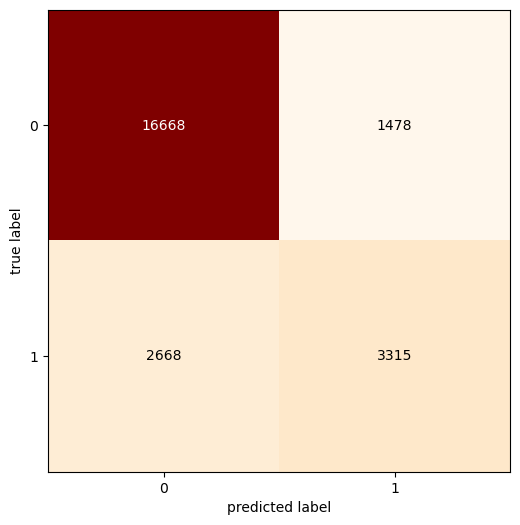

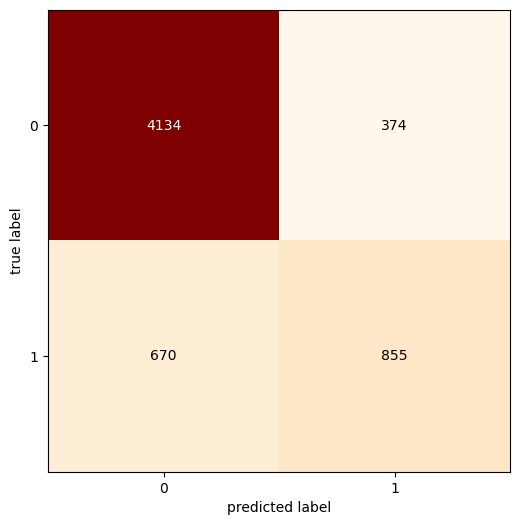

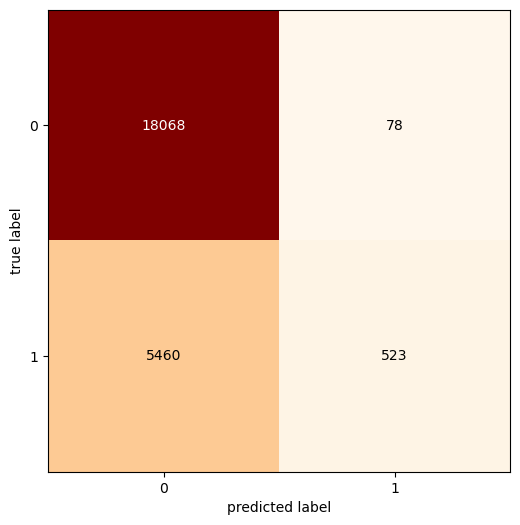

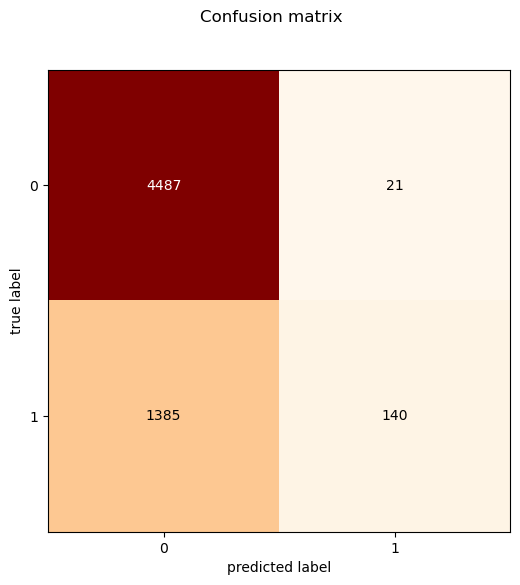

In [51]:
#Logistic Regression train SN
plot_confusion_matrix(conf_mat=LRscores_train[4], figsize=(6, 6), cmap=plt.cm.OrRd)

#Logistic Regression test SN
plot_confusion_matrix(conf_mat=LRscores_test[4], figsize=(6, 6), cmap=plt.cm.OrRd)

#Logistic Regression train STD
plot_confusion_matrix(conf_mat=LRscores_std_train[4], figsize=(6, 6), cmap=plt.cm.OrRd)

#Logistic Regression test STD
plot_confusion_matrix(conf_mat=LRscores_std_test[4], figsize=(6, 6), cmap=plt.cm.OrRd)

plt.suptitle("Confusion matrix")
plt.show()

## KNN

In [52]:
max_neigh= 20

### KNN SN 

In [53]:
max_neigh = 20
l_results = {"Train":{}, "Test":{} }
for i in range(1, max_neigh+1):
    clf_aux = KNeighborsClassifier(n_neighbors= i)
    clf_aux.fit(X_train_sn, y_train_sn)
    
    #For Train 
    pred_knn_sn_train_aux = clf_aux.predict(X_train_sn)
    result = dame_scores(y_train_sn, pred_knn_sn_train_aux)
    l_results["Train"]["{}-vecinos".format(i)] = result
    
    #For Test
    pred_knn_sn_aux = clf_aux.predict(X_test_sn)
    result = dame_scores(y_test_sn, pred_knn_sn_aux)
    l_results["Test"]["{}-vecinos".format(i)] = result

In [54]:
x_vecinos = [f"{i}-vecinos" for i in range(1, max_neigh+1)]

In [55]:
y_train_knn_acc_sn = [l_results["Train"][f"{i}-vecinos"][0] for i in range(1, max_neigh+1)]
y_train_knn_prec_sn = [l_results["Train"][f"{i}-vecinos"][1] for i in range(1, max_neigh+1)]
y_train_knn_rec_sn = [l_results["Train"][f"{i}-vecinos"][2] for i in range(1, max_neigh+1)]
y_train_knn_f1_sn = [l_results["Train"][f"{i}-vecinos"][3] for i in range(1, max_neigh+1)]

In [56]:
y_test_knn_acc_sn = [l_results["Test"][f"{i}-vecinos"][0] for i in range(1, max_neigh+1)]
y_test_knn_prec_sn = [l_results["Test"][f"{i}-vecinos"][1] for i in range(1, max_neigh+1)]
y_test_knn_rec_sn = [l_results["Test"][f"{i}-vecinos"][2] for i in range(1, max_neigh+1)]
y_test_knn_f1_sn = [l_results["Test"][f"{i}-vecinos"][3] for i in range(1, max_neigh+1)]

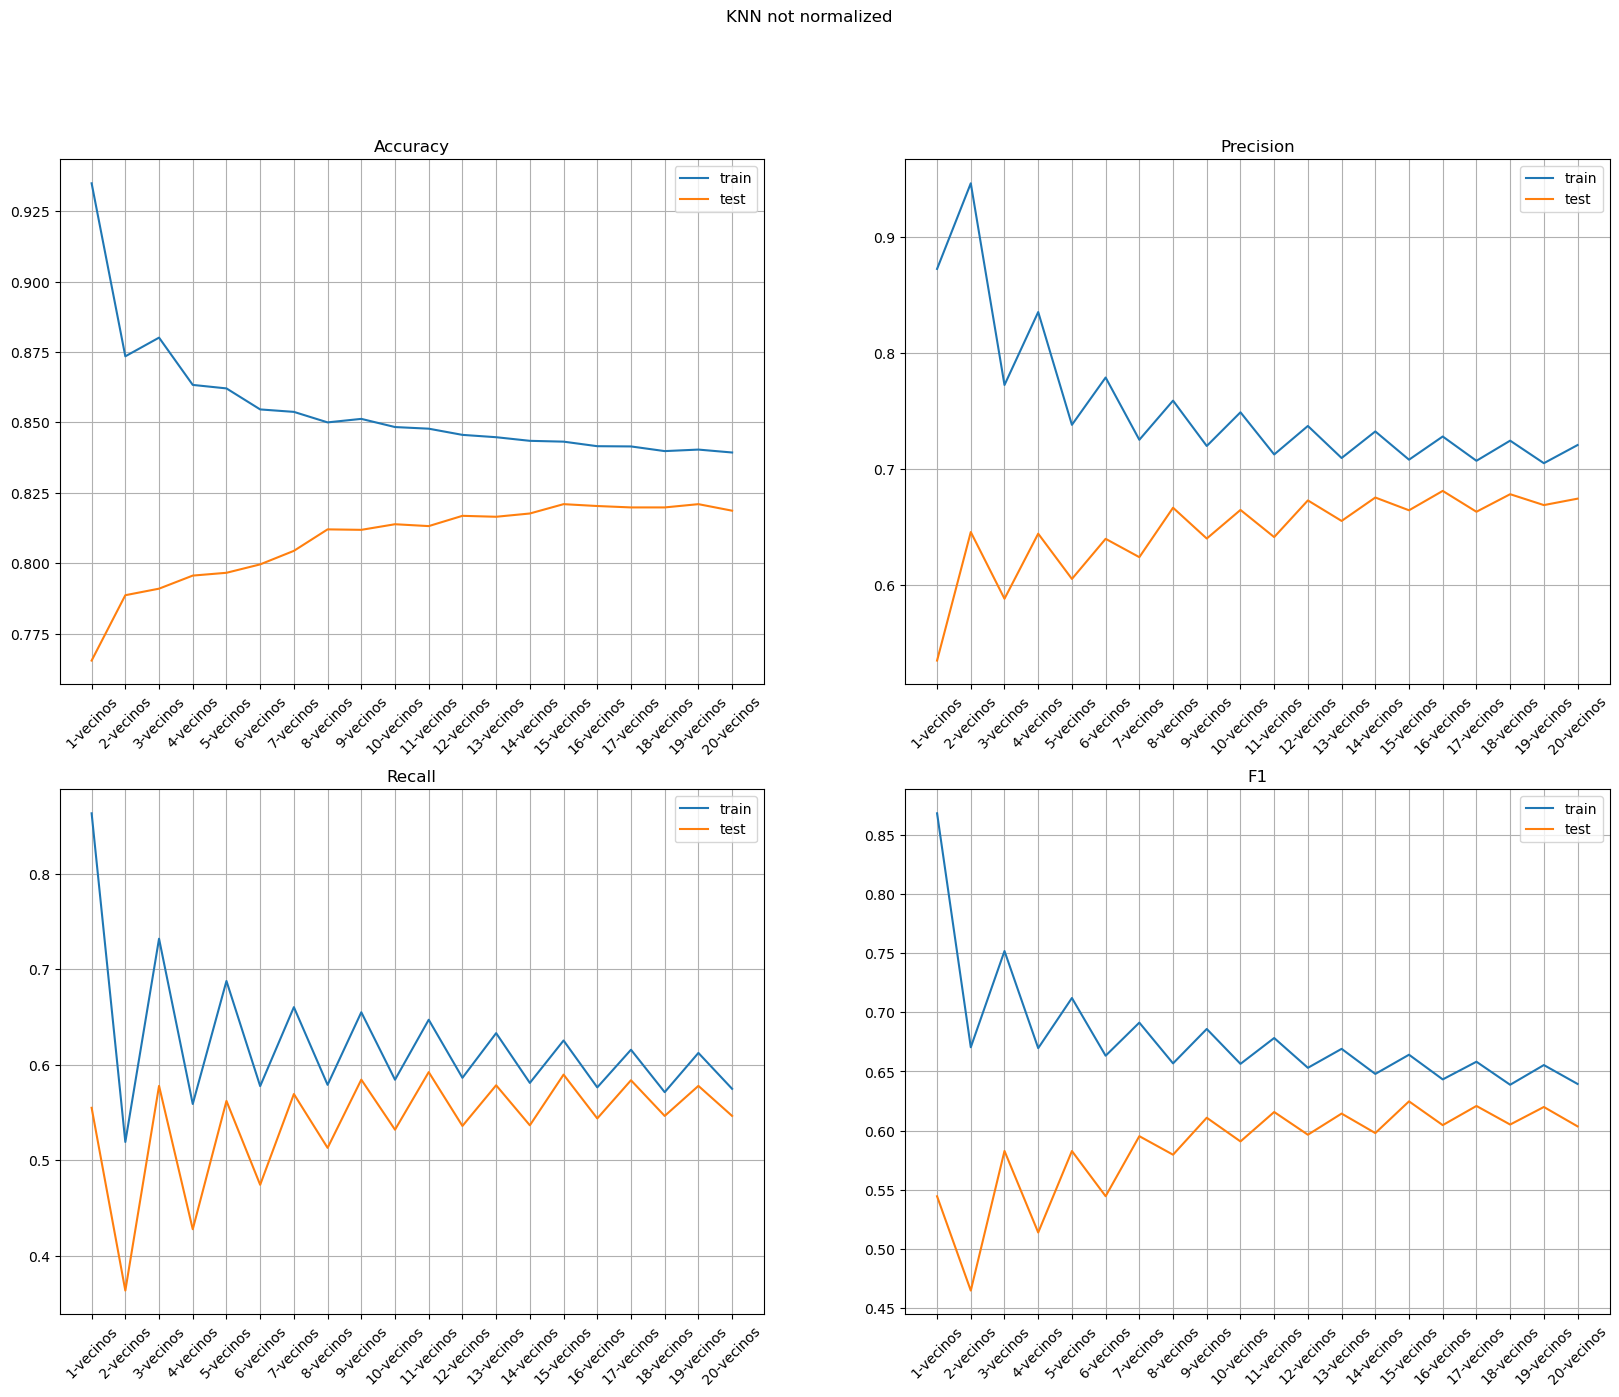

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15))


ax1.plot(x_vecinos, y_train_knn_acc_sn, label="train")
ax1.plot(x_vecinos, y_test_knn_acc_sn, label= "test")
ax1.set_title("Accuracy")
ax1.set_xticklabels(x_vecinos, rotation=45)
ax1.legend()
ax1.grid()

ax2.plot(x_vecinos, y_train_knn_prec_sn, label="train")
ax2.plot(x_vecinos, y_test_knn_prec_sn, label= "test")
ax2.set_title("Precision")
ax2.set_xticklabels(x_vecinos, rotation=45)
ax2.legend()
ax2.grid()

ax3.plot(x_vecinos, y_train_knn_rec_sn, label="train")
ax3.plot(x_vecinos, y_test_knn_rec_sn, label= "test")
ax3.set_title("Recall")
ax3.set_xticklabels(x_vecinos, rotation=45)
ax3.legend()
ax3.grid()

ax4.plot(x_vecinos, y_train_knn_f1_sn, label="train")
ax4.plot(x_vecinos, y_test_knn_f1_sn, label= "test")
ax4.set_title("F1")
ax4.set_xticklabels(x_vecinos, rotation=45)
ax4.legend()
ax4.grid()

plt.suptitle("KNN not normalized")
plt.show()

### KNN STD

In [58]:
results_std = {"Train":{}, "Test":{} }
for i in range(1, max_neigh+1):
    clf_aux = KNeighborsClassifier(n_neighbors= i)
    clf_aux.fit(X_train_std, y_train_std)
    
    #For Train 
    pred_knn_std_train_aux = clf_aux.predict(X_train_std)
    result = dame_scores(y_train_std, pred_knn_std_train_aux)
    results_std["Train"]["{}-vecinos".format(i)] = result
    
    #For Test
    pred_knn_std_aux = clf_aux.predict(X_test_std)
    result = dame_scores(y_test_std, pred_knn_std_aux)
    results_std["Test"]["{}-vecinos".format(i)] = result

In [59]:
y_train_knn_acc_std = [results_std["Train"][f"{i}-vecinos"][0] for i in range(1, max_neigh+1)]
y_train_knn_prec_std = [results_std["Train"][f"{i}-vecinos"][1] for i in range(1, max_neigh+1)]
y_train_knn_rec_std = [results_std["Train"][f"{i}-vecinos"][2] for i in range(1, max_neigh+1)]
y_train_knn_f1_std = [results_std["Train"][f"{i}-vecinos"][3] for i in range(1, max_neigh+1)]

In [60]:
y_test_knn_acc_std = [results_std["Test"][f"{i}-vecinos"][0] for i in range(1, max_neigh+1)]
y_test_knn_prec_std = [results_std["Test"][f"{i}-vecinos"][1] for i in range(1, max_neigh+1)]
y_test_knn_rec_std = [results_std["Test"][f"{i}-vecinos"][2] for i in range(1, max_neigh+1)]
y_test_knn_f1_std = [results_std["Test"][f"{i}-vecinos"][3] for i in range(1, max_neigh+1)]

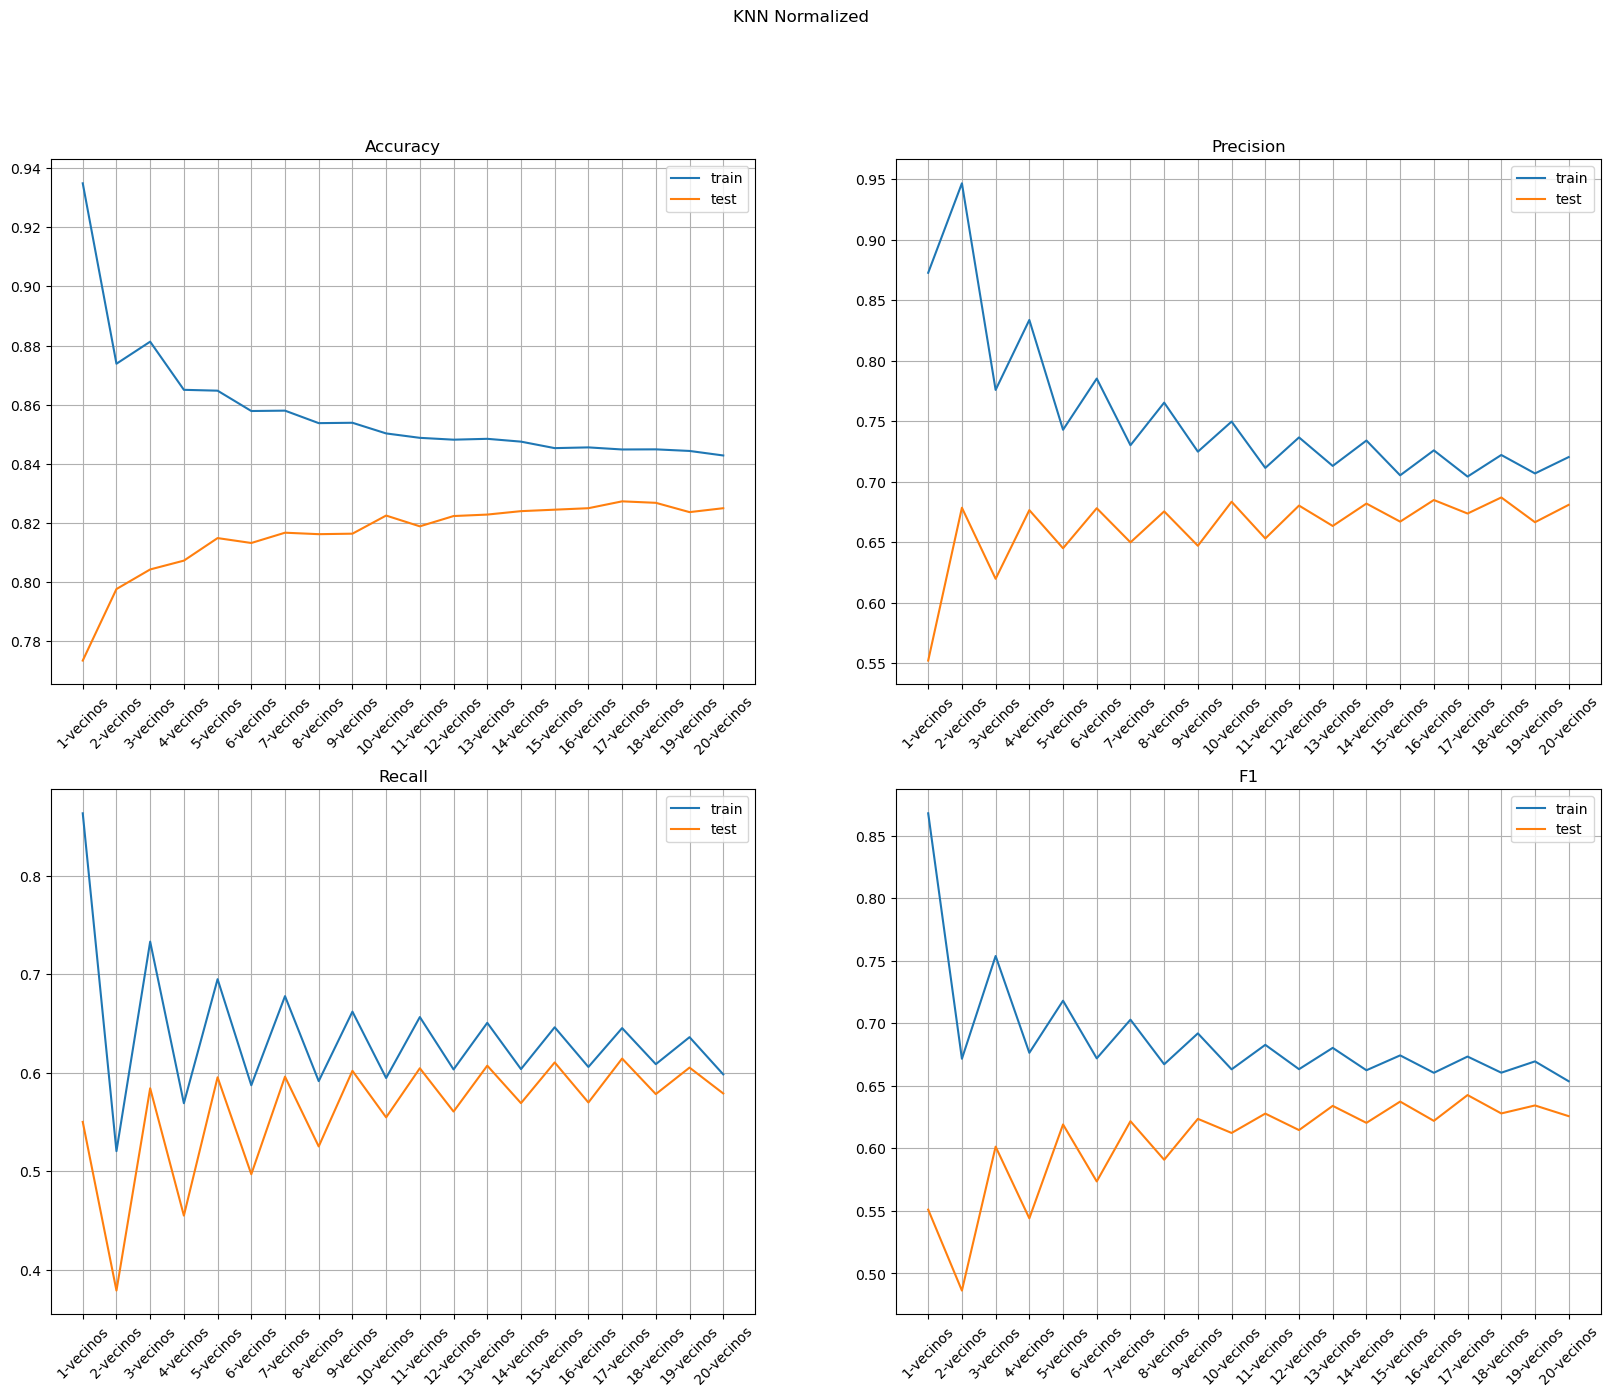

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15))


ax1.plot(x_vecinos, y_train_knn_acc_std, label="train")
ax1.plot(x_vecinos, y_test_knn_acc_std, label= "test")
ax1.set_title("Accuracy")
ax1.set_xticklabels(x_vecinos, rotation=45)
ax1.legend()
ax1.grid()

ax2.plot(x_vecinos, y_train_knn_prec_std, label="train")
ax2.plot(x_vecinos, y_test_knn_prec_std, label= "test")
ax2.set_title("Precision")
ax2.set_xticklabels(x_vecinos, rotation=45)
ax2.legend()
ax2.grid()

ax3.plot(x_vecinos, y_train_knn_rec_std, label="train")
ax3.plot(x_vecinos, y_test_knn_rec_std, label= "test")
ax3.set_title("Recall")
ax3.set_xticklabels(x_vecinos, rotation=45)
ax3.legend()
ax3.grid()

ax4.plot(x_vecinos, y_train_knn_f1_std, label="train")
ax4.plot(x_vecinos, y_test_knn_f1_std, label= "test")
ax4.set_title("F1")
ax4.set_xticklabels(x_vecinos, rotation=45)
ax4.legend()
ax4.grid()

plt.suptitle("KNN Normalized")
plt.show()

## Decision Trees

### Decision Trees SN

In [62]:
dtc_results_sn = {"Train": {}, "Test": {} }

for x in range(2,200):
    dtc = DecisionTreeClassifier(max_leaf_nodes=x)
    dtc.fit(X_train_sn, y_train_sn)
    
    #For Train 
    dtc_pred_train= dtc.predict(X_train_sn)
    dtc_results_sn["Train"][x] = dame_scores(y_train_sn, dtc_pred_train)
    
    #For Test
    dtc_pred_test= dtc.predict(X_test_sn)
    dtc_results_sn["Test"][x] = dame_scores(y_test_sn, dtc_pred_test)

In [63]:
#list with all the metrics of Decision Tree SN
y_train_dtc_acc_sn = [dtc_results_sn["Train"][x][0] for x in range(2,200)]
y_train_dtc_prec_sn = [dtc_results_sn["Train"][x][1] for x in range(2,200)]
y_train_dtc_rec_sn = [dtc_results_sn["Train"][x][2] for x in range(2,200)]
y_train_dtc_f1_sn = [dtc_results_sn["Train"][x][3] for x in range(2,200)]

#list with all the metrics of Decision Tree SN
y_test_dtc_acc_sn = [dtc_results_sn["Test"][x][0] for x in range(2,200)]
y_test_dtc_prec_sn = [dtc_results_sn["Test"][x][1] for x in range(2,200)]
y_test_dtc_rec_sn = [dtc_results_sn["Test"][x][2] for x in range(2,200)]
y_test_dtc_f1_sn = [dtc_results_sn["Test"][x][3] for x in range(2,200)]

#List with the number of leaves
n_leaves = [str(x) for x in range(2,200)]

### Decision Trees STD

In [64]:
dtc_results_std = {"Train": {}, "Test": {} }

for x in range(2,200):
    dtc_std = DecisionTreeClassifier(max_leaf_nodes=x)
    dtc_std.fit(X_train_std, y_train_std)
    
    #For Train 
    pred_train_std = dtc_std.predict(X_train_std)
    dtc_results_std["Train"][x] = dame_scores(y_train_std, pred_train_std)
    
    #For Test
    pred_test_std = dtc_std.predict(X_test_std)
    dtc_results_std["Test"][x] = dame_scores(y_test_std, pred_test_std)

In [65]:
#list with all the metrics of Decision Tree STD
y_train_dtc_acc_std = [dtc_results_std["Train"][x][0] for x in range(2,200)]
y_train_dtc_prec_std = [dtc_results_std["Train"][x][1] for x in range(2,200)]
y_train_dtc_rec_std = [dtc_results_std["Train"][x][2] for x in range(2,200)]
y_train_dtc_f1_std = [dtc_results_std["Train"][x][3] for x in range(2,200)]

#list with all the metrics of Decision Tree STD
y_test_dtc_acc_std = [dtc_results_std["Test"][x][0] for x in range(2,200)]
y_test_dtc_prec_std = [dtc_results_std["Test"][x][1] for x in range(2,200)]
y_test_dtc_rec_std = [dtc_results_std["Test"][x][2] for x in range(2,200)]
y_test_dtc_f1_std = [dtc_results_std["Test"][x][3] for x in range(2,200)]


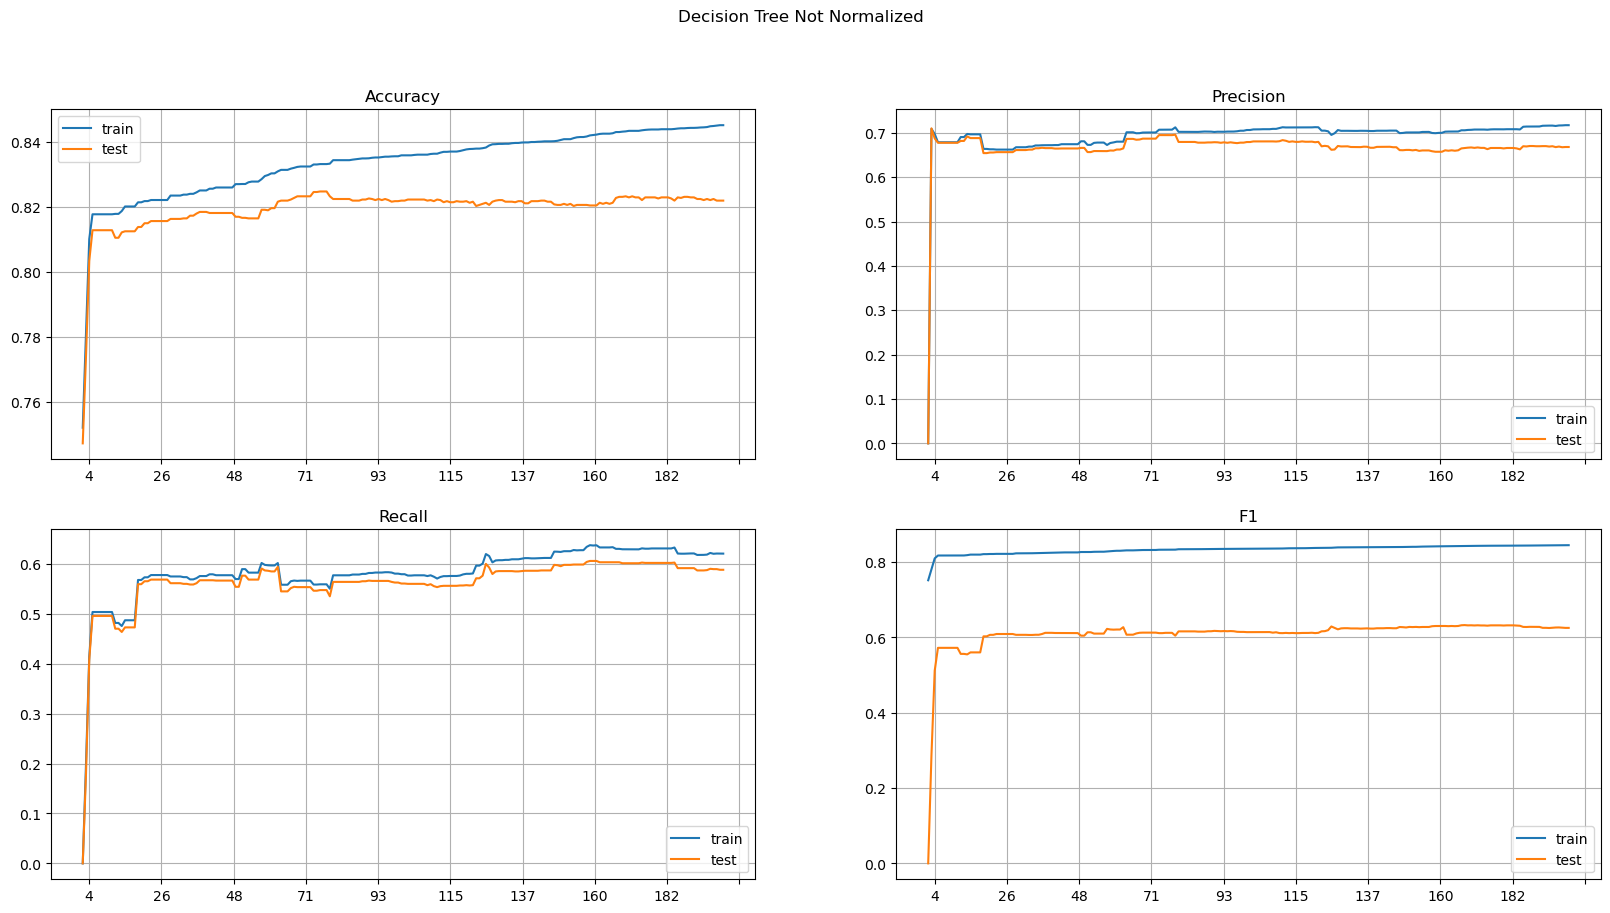

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))

ax1.plot(n_leaves, y_train_dtc_acc_sn, label="train")
ax1.plot(n_leaves, y_test_dtc_acc_sn, label= "test")
ax1.set_title("Accuracy")
ax1.set_xticks(np.linspace(2, 202, 10))
ax1.legend()
ax1.grid()

ax2.plot(n_leaves, y_train_dtc_prec_sn, label="train")
ax2.plot(n_leaves, y_test_dtc_prec_sn, label= "test")
ax2.set_title("Precision")
ax2.set_xticks(np.linspace(2, 202, 10))
ax2.legend()
ax2.grid()

ax3.plot(n_leaves, y_train_dtc_rec_sn, label="train")
ax3.plot(n_leaves, y_test_dtc_rec_sn, label= "test")
ax3.set_title("Recall")
ax3.set_xticks(np.linspace(2, 202, 10))
ax3.legend()
ax3.grid()

ax4.plot(n_leaves, y_train_dtc_acc_sn, label="train")
ax4.plot(n_leaves, y_test_dtc_f1_sn, label= "test")
ax4.set_title("F1")
ax4.set_xticks(np.linspace(2, 202, 10))
ax4.legend()
ax4.grid()

plt.suptitle("Decision Tree Not Normalized")
plt.show()

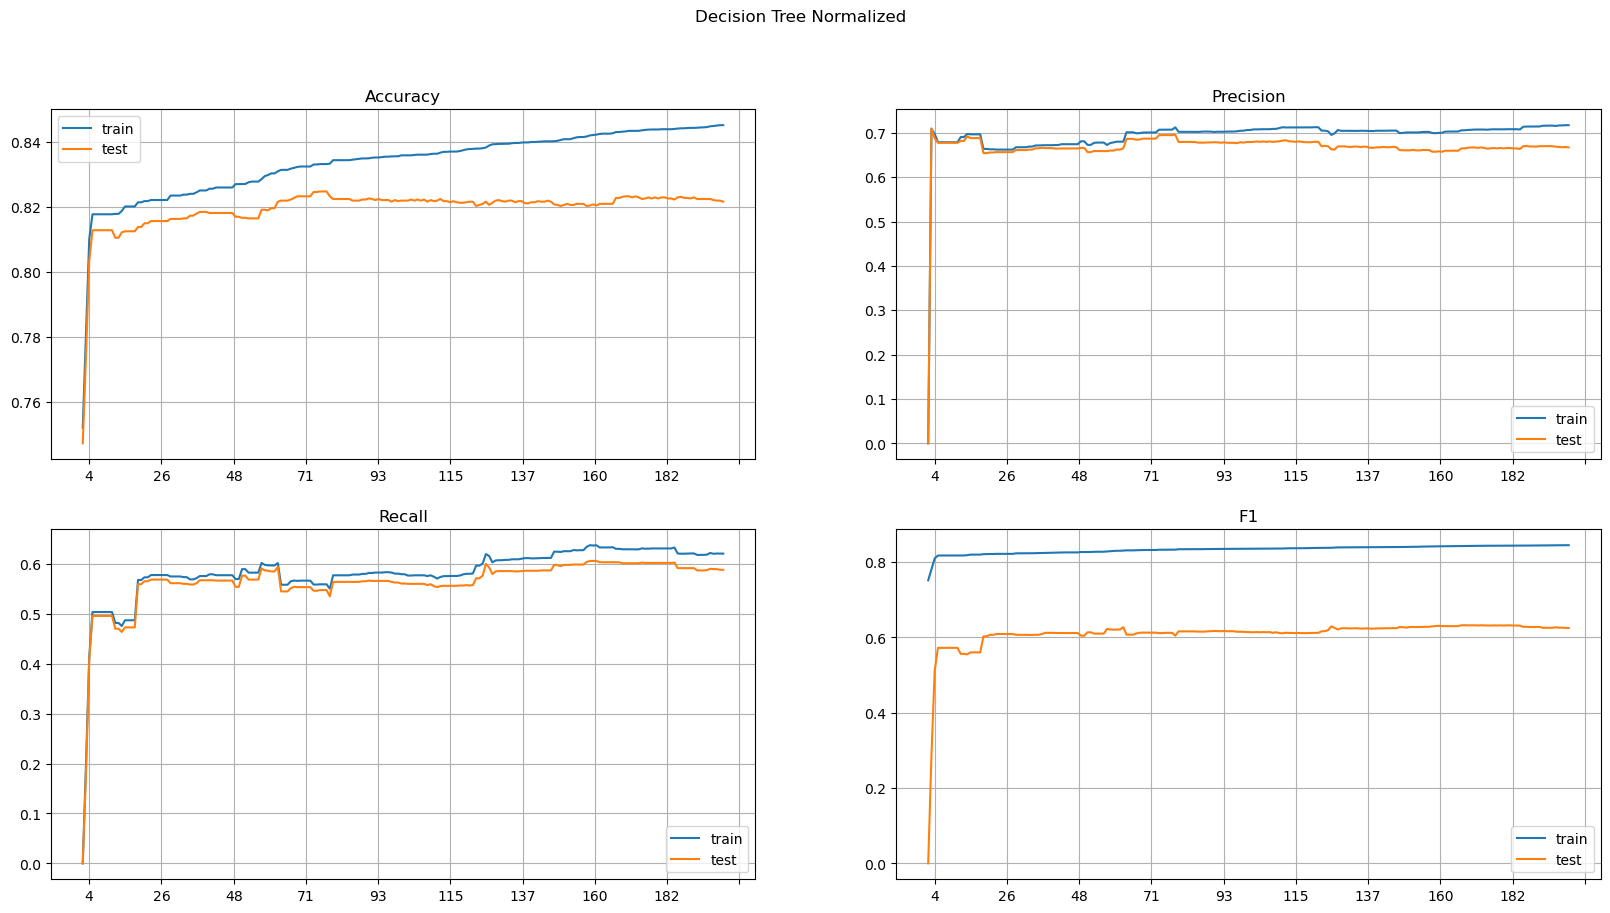

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))

ax1.plot(n_leaves, y_train_dtc_acc_std, label="train")
ax1.plot(n_leaves, y_test_dtc_acc_std, label= "test")
ax1.set_title("Accuracy")
ax1.set_xticks(np.linspace(2, 202, 10))
ax1.legend()
ax1.grid()

ax2.plot(n_leaves, y_train_dtc_prec_std, label="train")
ax2.plot(n_leaves, y_test_dtc_prec_std, label= "test")
ax2.set_title("Precision")
ax2.set_xticks(np.linspace(2, 202, 10))
ax2.legend()
ax2.grid()

ax3.plot(n_leaves, y_train_dtc_rec_std, label="train")
ax3.plot(n_leaves, y_test_dtc_rec_std, label= "test")
ax3.set_title("Recall")
ax3.set_xticks(np.linspace(2, 202, 10))
ax3.legend()
ax3.grid()

ax4.plot(n_leaves, y_train_dtc_acc_std, label="train")
ax4.plot(n_leaves, y_test_dtc_f1_std, label= "test")
ax4.set_title("F1")
ax4.set_xticks(np.linspace(2, 202, 10))
ax4.legend()
ax4.grid()

plt.suptitle("Decision Tree Normalized")
plt.show()

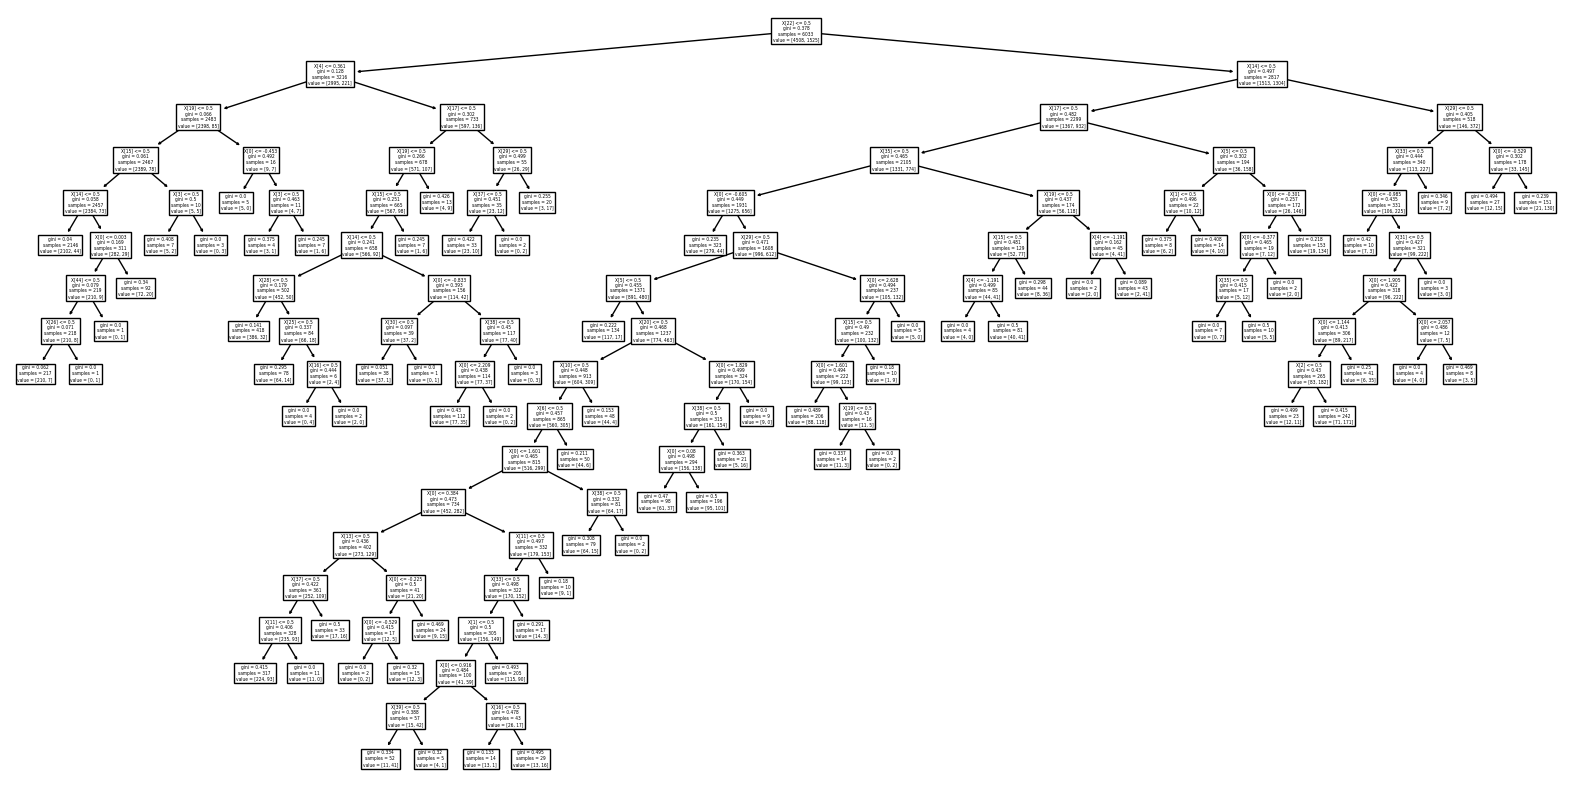

In [68]:
dtc_std_graph = DecisionTreeClassifier(max_leaf_nodes=73)
dtc_std_graph.fit(X_test_std, y_test_std)
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dtc_std_graph)
plt.show()

## ROC Logic Regression representation

In [69]:
#Logistic regression

logisticRegr_std = LogisticRegression(max_iter=10000)
logisticRegr_std.fit(X_train_std, y_train_std)


LogisticRegression(max_iter=10000)

In [70]:
#ROC representation
y_pred_std = logisticRegr_std.predict(X_test_std)

roc_curve(y_test_std, y_pred_std, pos_label=None, sample_weight=None, drop_intermediate=True)

(array([0.        , 0.08296362, 1.        ]),
 array([0.        , 0.56065574, 1.        ]),
 array([2, 1, 0], dtype=int8))

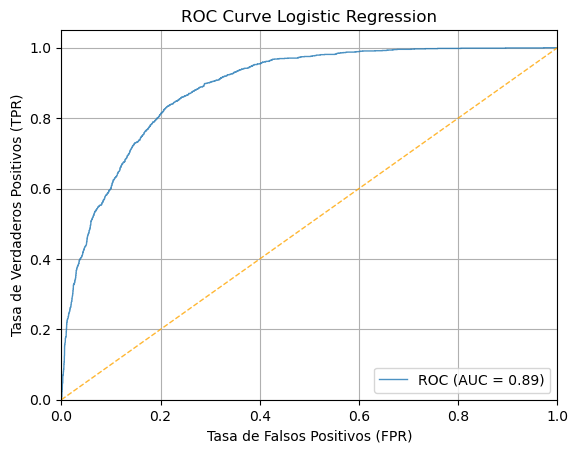

In [71]:
# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred_std_prob = logisticRegr_std.predict_proba(X_test_std)[:,1]

# Calcular los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_std, y_pred_std_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='orange', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## ROC KNN representation

We choose 15 neighbors because It gave us the best results (We saw those results in the graphics)

In [72]:
#Model training for KNN with 15 neighbours with standardized values

clf_std_15 = KNeighborsClassifier(n_neighbors= 15)
clf_std_15.fit(X_train_std, y_train_std)

KNeighborsClassifier(n_neighbors=15)

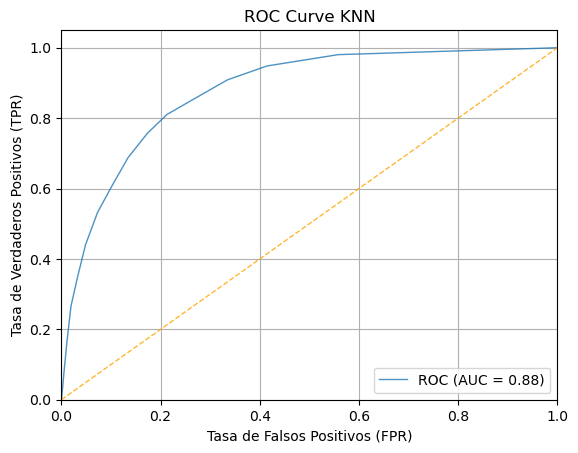

In [73]:
#ROC representation
y_pred_std_prob = clf_std_15.predict_proba(X_test_std)[:,1]

# Calcular los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_std, y_pred_std_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='orange', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## ROC Decission Tree representation

We choose 73 leaves because It gave us the best results (We saw those results in the graphics)

In [74]:
#DecisionTree

dtc_std_73 = DecisionTreeClassifier(max_leaf_nodes=73)
dtc_std_73.fit(X_train_std, y_train_std)



DecisionTreeClassifier(max_leaf_nodes=73)

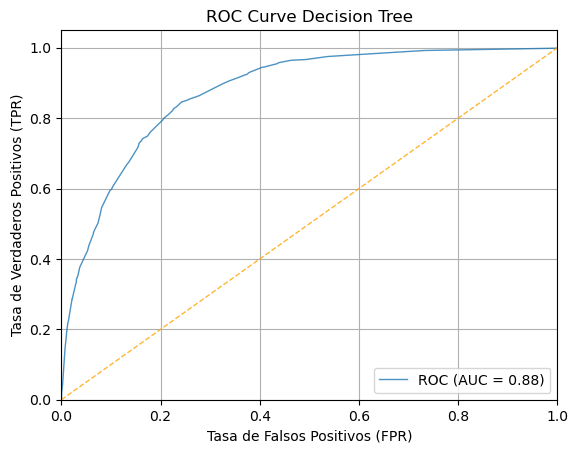

In [75]:
#ROC Representation
#ROC representation
y_pred_std_prob = dtc_std_73.predict_proba(X_test_std)[:,1]

# Calcular los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_std, y_pred_std_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='orange', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('ROC Curve Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Comparation of the results of the best models for each algorithms

In [76]:
#Logistic regression scores
LR_scores_repr = LRscores_std_test[:4]

#KNN scores
KNN_scores_repr = results_std["Test"]["15-vecinos"][:4]

#Decision Tree scores
DT_scores_repr = dtc_results_std["Test"][73][:4]

aux_to_df = [[*LR_scores_repr], [*KNN_scores_repr], [*DT_scores_repr]]

df_best_models = pd.DataFrame(aux_to_df, columns=["Accuracy", "Precision", "Recall", "f1"], 
                              index=["Logistic Regression", "KNN", "Decision Tree"])

df_best_models

,Accuracy,Precision,Recall,f1
Logistic Regression,0.766948,0.869565,0.091803,0.166074
KNN,0.824465,0.666905,0.610492,0.637453
Decision Tree,0.824631,0.694746,0.546230,0.611601


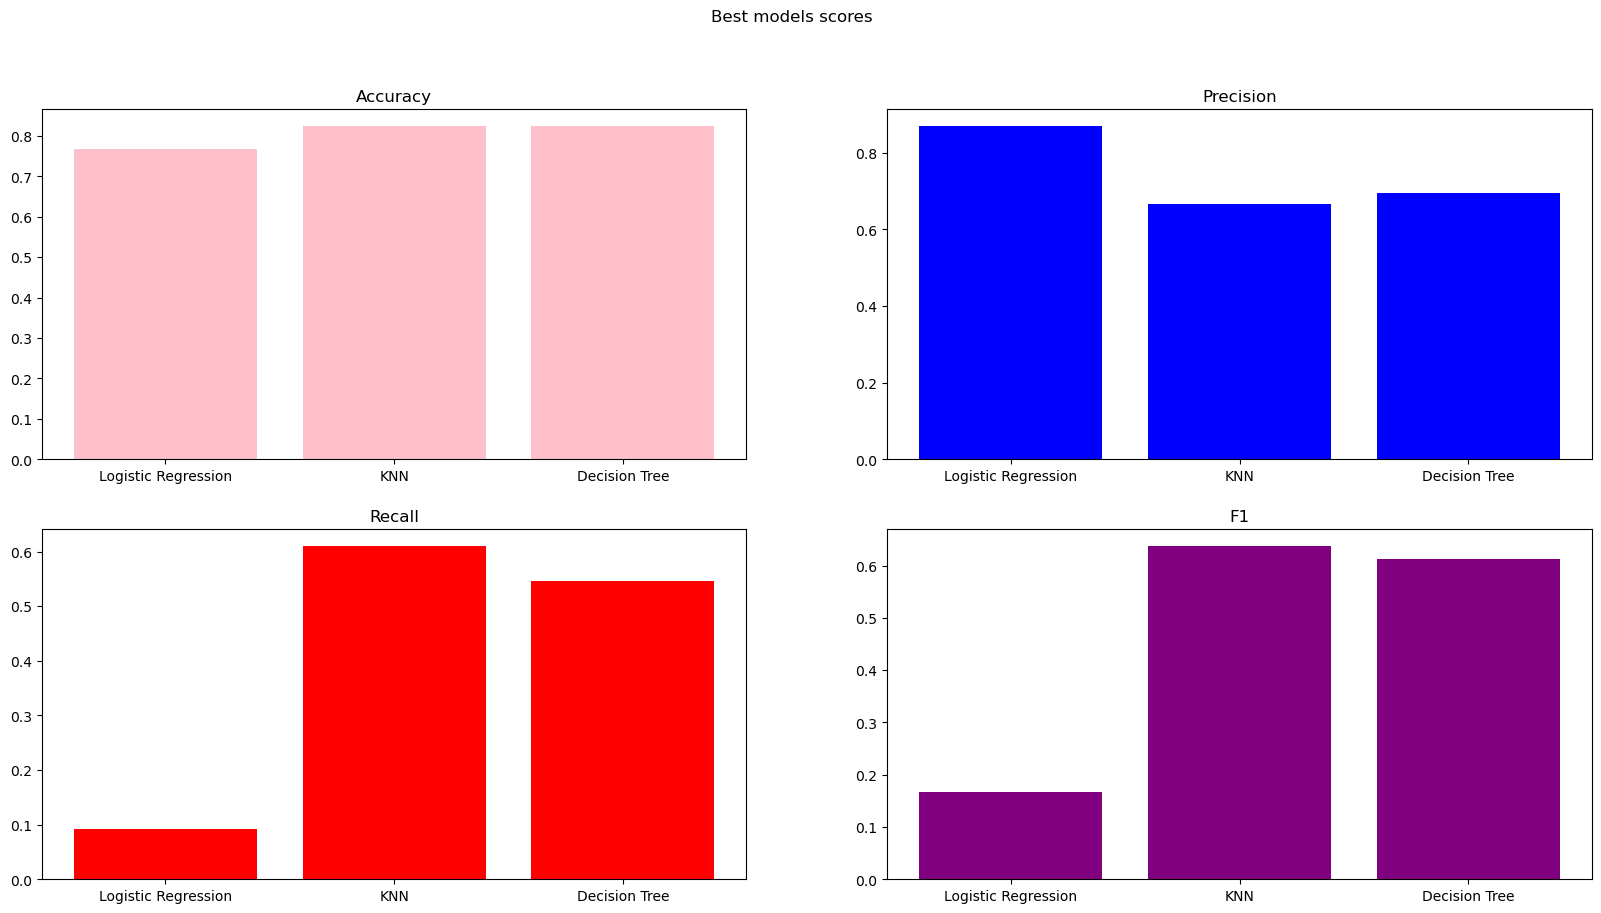

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,10))

ax1.bar(df_best_models.index, height=df_best_models.Accuracy, color="pink")
ax1.set_title("Accuracy")

ax2.bar(df_best_models.index, height=df_best_models.Precision, color="blue")
ax2.set_title("Precision")

ax3.bar(df_best_models.index, height=df_best_models.Recall, color="red")
ax3.set_title("Recall")

ax4.bar(df_best_models.index, height=df_best_models.f1, color="purple")
ax4.set_title("F1")

plt.suptitle("Best models scores")
plt.show()

# Conclusion

If there are not many columns to standardize whether or not to do so, it does not change the results significantly.

KNN was the most computacional expensive algorithm.

For this dataset (preprocesed as we did) KNN give us the best results.